# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [42]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [43]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [44]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [45]:
# !pip freeze > requirements.txt

In [46]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

In [47]:
from P4_functions import *

Importation of modules and packages. 

In [48]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

# from ipywidgets import interact, interact_manual

import dill

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph

import category_encoders as ce

import scipy.stats as st

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import * 
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [49]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 100,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

To play audio text-to-speech during execution.

In [50]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [51]:
plot_enabled = False
save_enabled = False

In [52]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [53]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',', index_col='Unnamed: 0',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv in the notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv in the notebook OK


In [54]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'ZipCode', 'La

In [55]:
df['ZipCode'] = df['ZipCode'].apply(str).astype('object')
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].apply(str).astype('object')

In [56]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio',
            'Outlier'] # 'ENERGYSTARScore',
prop_C_cols = ['Neighborhood', 'ZipCode', 'CouncilDistrictCode',
               'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']
target_cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
                'SiteEnergyUseWN(kBtu)_log', 'TotalGHGEmissions_log']

In [57]:
speak('Dataset successfully imported')

### 0.2 Overview

Printing total nb and percentage of null

In [58]:
print_null_pct(df)

nb of null:  2191 
pct of null:  2.0


Showing columns where there are still NaN values

In [59]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

TaxParcelIdentificationNumber       1
ENERGYSTARScore                   542
Comments                         1648
dtype: int64

In [60]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

We already found in the Cleaning_EDA notebook that the distribution of the target data could become almost normal with logarithmic transformation.

Here are the histograms of transformed values.

#### SiteEnergyUseWN(kBtu)

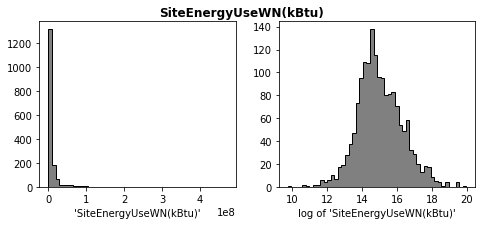

In [61]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUseWN(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'SiteEnergyUseWN(kBtu)'")
axs[1].hist(df['SiteEnergyUseWN(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'SiteEnergyUseWN(kBtu)'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('SiteEnergyUseWN(kBtu)', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

#### TotalGHGEmissions

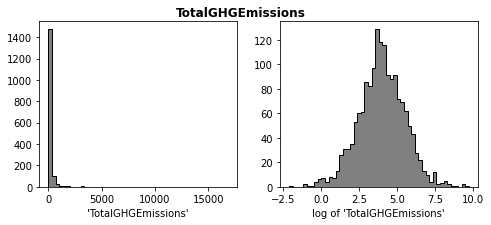

In [62]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'TotalGHGEmissions'")
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'TotalGHGEmissions'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('TotalGHGEmissions', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

### 1.2 First features selection

#### Quantitative data

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'
- 'ExtsurfVolRatio' is strongly correlated with 'NumberofBuildings'

In [63]:
prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
                              ['PropertyGFATotal',
                               'PropertyGFABuilding(s)',
                               'ExtsurfVolRatio']]

#### Categorical data

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [64]:
prop_C_cols_sel = [c for c in prop_C_cols if c not in ['LargestPropertyUseType']]

### 1.3 Splitting training and testing set 

In [65]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y1 = df['SiteEnergyUseWN(kBtu)']
df_y2 = df['TotalGHGEmissions']

Since 'PrimaryProperty_Type' seems to be the categorical value the most strongly related (seem ppscores in §2.2 of the Cleaning_EDA notebook) to our target features, we split the data with stratification using this column.

In [66]:
''' 'Neighborhood', 'CouncilDistrictCode', 'ZipCode', 'Outlier', 'BuildingType',
'PrimaryPropertyType', 'EnergyProfile', 'MainEnergy', 'CertifiedPreviousYear' '''

group_col = 'EnergyProfile'

X_tr, X_te, y1_tr, y1_te = train_test_split(df_X, df_y1,
                                            train_size=0.8, shuffle=True,
                                            stratify=df[group_col],
                                            random_state=14)

In [67]:
y1_log_tr, y1_log_te  = np.log(y1_tr), np.log(y1_te)

Training and testing set for linear regression (avoiding colinearity)

In [68]:
X_tr_sel = X_tr[prop_Q_cols_sel+prop_C_cols_sel]
X_te_sel = X_te[prop_Q_cols_sel+prop_C_cols_sel]

Printing the quantitative and categorical independent columns:

In [69]:
print(f'--- {X_tr.columns.shape[0]} independent columns ---\
\nquantitative ({len(prop_Q_cols)}): {prop_Q_cols},\
\ncategorical ({len(prop_C_cols)}): {prop_C_cols}')

--- 25 independent columns ---
quantitative (14): ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'BuildingAge', 'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio', 'Outlier'],
categorical (11): ['Neighborhood', 'ZipCode', 'CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']


In [70]:
print("--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---\n" ,
      set(X_tr.columns) - set(X_tr_sel.columns))

--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---
 {'PropertyGFABuilding(s)', 'PropertyGFATotal', 'ExtsurfVolRatio', 'LargestPropertyUseType'}


### 1.4 Feature transformations

__Quantitative data__

Standardizing the quantitative values.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal. We'll choose between:
- Ordinal Encoding (boolean): 'CertifiedPreviousYear'(2)
- One-Hot Encoding (low cardinality):
'BuildingType'(5), 'MainEnergy'(3), 'EnergyProfile'(8)
- Binary or Hashing or Leave-One-Out target encoding (high cardinality):
('Neighborhood', 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

 NB: The transformation of the columns is all included in the Class CustTransformer (see P4_funtions.py file).

In [103]:
def model_optimizer(data_preproc, name_reg, reg, param_grid,
                    Xtr, ytr, Xte, yte,
                    cv_search=5, groups=None, cv_test=6,
                    scv_scores='neg_root_mean_squared_error',
                    search_strat='grid', n_iter=10,
                    cross_val=False):

    pipe = Pipeline([('preproc', data_preproc),
                    (name_reg, reg)])
    
    # researching best hyperparameters and fitting on training set
    if search_strat=='grid':
        scv = GridSearchCV(pipe, param_grid = param_grid,
                           cv=cv_search, scoring=scv_scores,
                           refit='neg_root_mean_squared_error',
                           return_train_score=True, verbose=1)
        print("Grid")
    elif search_strat=='rand':
        scv = RandomizedSearchCV(pipe, param_distributions = param_grid,
                            cv=cv_search, n_iter= n_iter,
                            scoring=scv_scores, 
                            refit='neg_root_mean_squared_error',
                            return_train_score=True, verbose=1)
        print("Randomized")
    else:
        print("ERROR: This strategy of hyperparameter tuning does not exist.")
    scv.fit(Xtr, ytr, groups=groups) # to stratify the folds using a GroupFolds

    # best hyperparams
    df_res = pd.DataFrame(dtype = 'object')
    df_res.at['name_params', name_reg] =\
                    str(list(param_grid.keys()))
    df_res.at['best_params', name_reg] =\
                    str([scv.best_params_[p] for p in param_grid])

    # # scores obtained during searchCV (training, testing)

### RECUPERER TOUS LES SCORES DES MEILLEURS PARAMETRES

    # score of the model with best params on testing set
    ypr = scv.predict(Xte)
    res = scores_reg(name_reg, Xte, yte, ypr,
    	             exclude=['Adj_R2']).astype('object')
    df_res = df_res.append(res.to_frame())

    # mean cv score of the model with best params on testing set
    if cross_val:
        res = cv_scores_reg(name_reg, scv.best_estimator_,
                            Xte, yte, cv=cv_test).astype('object')
        df_res = df_res.append(res.to_frame())

    return scv, df_res

## 2 First model selection

### 2.0 Dummy Regressor baseline

In [72]:
df_res = pd.DataFrame(dtype = 'object')

In [129]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
name_reg = 'Dummy'

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['bin'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'],
            'Dummy__strategy': ['mean']}

dum_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, scv_scores = ['neg_root_mean_squared_error', 
                                              'neg_mean_absolute_error',
                                              'r2'],
                     search_strat='grid')

df_res = pd.concat([df_res, new_df_res], axis=1)

Grid
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [130]:
df_res

,KNN,Dummy,Dummy,Dummy
name_params,"['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat...","['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat...","['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat...","['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat..."
best_params,"['ord', 'bin', 'ord', 'stand', 2, 1]","['ord', 'ohe', 'hash', 'stand', 'mean']","['ord', 'bin', 'ord', 'stand', 'mean']","['ord', 'bin', 'ord', 'stand', 'median']"
MAE,5129699.11,9517154.50,9517154.50,7645237.71
MSE,338402394052768.00,677093130764919.25,677093130764919.25,715164101061489.88
RMSE,18395716.73,26021013.25,26021013.25,26742552.25
R2,0.50,-0.00,-0.00,-0.06
expl_var,0.51,0.00,0.00,0.00
MAPE,122.94,582.62,582.62,182.45
MSPE,1239.19,28501.08,28501.08,3095.69


In [73]:
#  # TESTS RAPIDES
# my_knn = KNeighborsRegressor(n_neighbors=5)

# cust_trans = CustTransformer(thresh_card=12,
#                              strat_binary='ord',
#                              strat_low_card='ohe',
#                              strat_high_card='hash',
#                              strat_quant='stand').fit(X_tr, y1_tr)
# X_tr_enc = cust_trans.transform(X_tr)
# my_knn.fit(X_tr_enc, y1_tr)
# X_te_enc = cust_trans.transform(X_te)
# y1_te_pr = my_knn.predict(X_te_enc)

# scores_reg('my_knn', X_te_enc, y1_te, y1_te_pr)

MAE                4990449.04
MSE        378086411956127.44
RMSE              19444444.24
R2                       0.44
expl_var                 0.45
MAPE                   119.16
MSPE                   910.53
Name: my_knn, dtype: float64

#### KNN regressor

In [106]:
# reg = KNeighborsRegressor()
# name_reg = 'KNN'

# param_grid={'preproc__strat_binary': ['ord'],
#             'preproc__strat_low_card': ['ohe', 'bin', 'ohe'], # 'bin', 'ohe' -> best='ohe'
#             'preproc__strat_high_card': ['ord', 'hash', 'loo'], # 'hash', 'loo', 'ord' -> best='ord'
#             'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
#             'KNN__n_neighbors': [1,2,3,5,7,9,11],
#             'KNN__p': [0,1,2]} # 0,1,2

# # refit is set by default with 'neg_root_mean_squared_error'
# knn_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
#                      name_reg, reg, param_grid,
#                      X_tr, y1_tr, X_te, y1_te,
#                      cv_search=GroupKFold(n_splits=5),
#                      groups=X_tr[group_col],
#                      cv_test=6, scv_scores = ['neg_root_mean_squared_error', 
#                                               'neg_mean_absolute_error',
#                                               'r2'],
#                      search_strat='grid')

# df_res = pd.concat([df_res, new_df_res], axis=1)

Grid
Fitting 5 folds for each of 189 candidates, totalling 945 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 945 out of 945 | elapsed: 14.8min finished


,KNN
name_params,"['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat..."
best_params,"['ord', 'bin', 'ord', 'stand', 2, 1]"
MAE,5129699.11
MSE,338402394052768.00
RMSE,18395716.73
R2,0.50
expl_var,0.51
MAPE,122.94
MSPE,1239.19


In [110]:
# import dill
# file = open(os.getcwd()+'/P4_Best_KNN.pkl', 'wb')
# dill.dump(knn_gscv, file)

file = open(os.getcwd()+'/P4_Best_KNN.pkl', 'rb')
knn_gscv = dill.load(file)

Plotting the main metrics obtained during SearchCV fitting (training/test set, and evaluation metrics on the test set

In [113]:
df_res

,KNN
name_params,"['preproc__strat_binary', 'preproc__strat_low_card', 'preproc__strat_high_card', 'preproc__strat..."
best_params,"['ord', 'bin', 'ord', 'stand', 2, 1]"
MAE,5129699.11
MSE,338402394052768.00
RMSE,18395716.73
R2,0.50
expl_var,0.51
MAPE,122.94
MSPE,1239.19


Getting data about influence of one parameter on the SCV metrics

In [117]:
best_params, df_sel, df_gscv_filt = filters_cv_results(knn_gscv,'KNN__n_neighbors')

In [118]:
df_sel

,mean_fit_time,mean_score_time,mean_test_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,mean_test_r2,mean_train_r2
param_KNN__n_neighbors,,,,,,,,
1,0.24,0.04,-19520531.93,0.00,-8893231.86,0.00,0.39,1.00
2,0.24,0.04,-16584515.79,-9152491.86,-7720976.98,-2850538.77,0.49,0.83
3,0.23,0.04,-18016150.25,-11876007.76,-8105976.25,-3488339.36,0.44,0.71
5,0.24,0.04,-20211068.08,-14436845.82,-8579212.96,-4086536.13,0.36,0.58
7,0.23,0.04,-21107306.32,-15831447.13,-8725547.19,-4394624.66,0.32,0.49
9,0.24,0.04,-21449494.24,-16653437.26,-8654130.41,-4609438.16,0.30,0.43
11,0.24,0.04,-21677400.87,-17287447.14,-8580850.51,-4742135.59,0.30,0.39


AttributeError: ignored

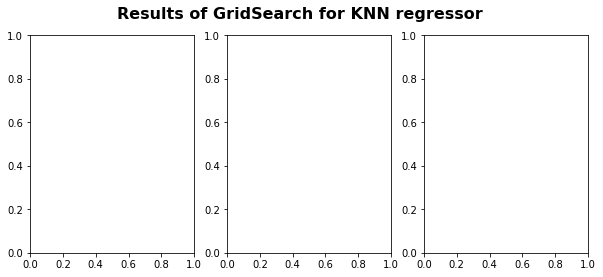

In [120]:
### A REPARER

plot_scv_multi_scores(knn_gscv, param='param_KNN__n_neighbors',
                      results=df_gscv_filt,
                      title="Results of GridSearch for KNN regressor")

Plotting the score of knn vs number of k_neighbors on the training set

In [123]:
### A REPARER (pbe multiscoring ?)
plot_1D_hyperparam_opt(knn_gscv, param='KNN__n_neighbors')

AssertionError: ignored

Plotting the learning curve of knn

Using matplotlib backend: agg


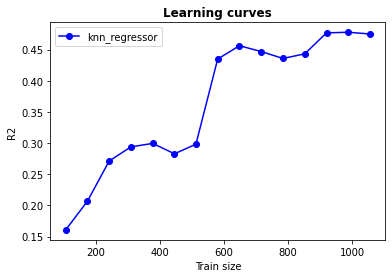

In [124]:
model = knn_gscv.best_estimator_
label = "knn_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,15),
                          scoring="r2", label="knn_regressor",
                          c='b') # , fig = fig
%matplotlib inline
fig

Plotting the score for two parameters

In [125]:
### A REPARER ??
plot_2D_hyperparam_opt(gscv = knn_gscv, params=['KNN__n_neighbors', 'KNN__p'])

AssertionError: ignored

Plotting the predicted values against the true values in test set for different groups.

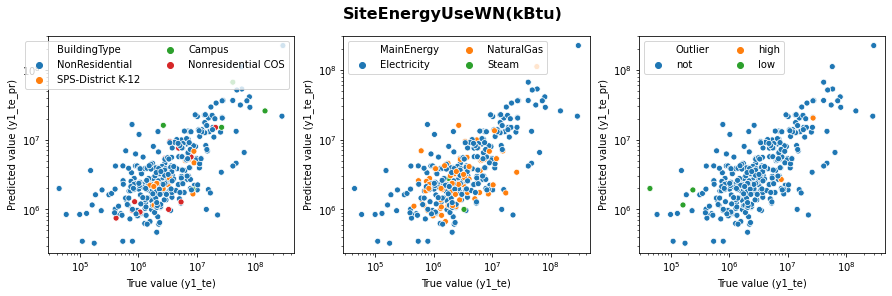

In [135]:
y1_pr = knn_gscv.predict(X_te)

col_groups = ['BuildingType', 'MainEnergy', 'Outlier']
fig, axs = plt.subplots(1,len(col_groups))
for c, ax in zip(col_groups, axs):
    sns.scatterplot(y1_te, y1_pr, hue=X_te[c], ax=ax)
    ax.set_xscale('log'), ax.set_yscale('log'),
    ax.set_xlabel('True value (y1_te)')
    ax.set_ylabel('Predicted value (y1_te_pr)')
    ax.legend( ncol=2, )#bbox_to_anchor=(0.6,-0.2),
fig.suptitle('SiteEnergyUseWN(kBtu)', fontsize=16, fontweight='bold')
fig.set_size_inches(5*len(col_groups),4)
fig.set_facecolor('w')
plt.show()

### 2.1 Linear regression - without regularization

In [34]:
df_lr = pd.DataFrame(dtype = 'object')

#### 'SiteEnergyUse(kBtu)' target

With all the features

In [35]:
reg = LinearRegression()
name_reg = 'LinReg(all)'

pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
pipe.fit(X_tr,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished


With selection of the features, trying to avoid colinearity

In [36]:
reg = LinearRegression()
name_reg = 'LinReg(sel)'

pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
pipe.fit(X_tr_sel,y1_tr)

df_lr = get_append_scores(name_reg, pipe, X_te_sel, y1_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s finished


#### 'SiteEnergyUse(kBtu)_log' target

In [37]:
reg = LinearRegression()
name_reg = 'LinReg_log(all)'

pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
pipe.fit(X_tr,y1_log_tr)

y_pr = pipe.predict(X_te)

df_lr = get_append_scores(name_reg, pipe, X_te, y1_log_te, df_lr, cv=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished


Show all the results

In [38]:
df_lr

,LinReg(all),LinReg(sel),LinReg_log(all)
RMSE,20110565.60,19873450.59,0.89
R2,0.40,0.42,0.56
mean_CV_te_RMSE,"[37709086.57469104, 49014045.552459575, 31747817.81785048, 10727172.032091442, 15016591.424172511]","[4.206757456107942e+17, 43812044.230691455, 29745663.60531966, 10727948.676777262, 12796254.5180...","[1.478896202649661, 1.891584802845132, 0.9558226111043934, 0.8665857957271479, 0.9424451844240949]"
mean_CV_te_R2,"[0.035914141694934454, -9.901504003457381, 0.28626248971977586, -1.1145797853407742, -0.35802670...","[-1.1998270075546729e+20, -7.710284760057592, 0.3734466058334568, -1.1148859865647966, 0.0138764...","[0.1103259913337099, -1.095808776374867, 0.5074493714641497, 0.40292920036335167, 0.462640799521..."


### 2.2 Linear Regularized Regressions

In [39]:
'''MODELES REGRESSEURS LINEAIRES DANS SKLEARN : 
Lars, LassoLars, ARDRegression, BayesianRidge, SGDRegressor, HuberRegressor,
RANSACRegressor, TheilSenRegressor, TweedieRegressor, GammaRegressor,
PoissonRegressor, PassiveAggressiveRegressor'''

from sklearn.linear_model import *

In [40]:
# sans optimisation

df_non_opt = pd.DataFrame(dtype = 'object')

for name_reg, reg in zip(['Ridge', 'Lasso', 'ElasticNet', 'Lars', 'LassoLars',
                          'ARDRegression', 'BayesianRidge', 'SGDRegressor',
                          'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor',
                          'PassiveAggressiveRegressor',
                          'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor'],
                         [Ridge(), Lasso(), ElasticNet(), Lars(), LassoLars(),
                          ARDRegression(), BayesianRidge(), SGDRegressor(),
                          HuberRegressor(), RANSACRegressor(), TheilSenRegressor(),
                          PassiveAggressiveRegressor(),
                          PoissonRegressor(), TweedieRegressor(), GammaRegressor()]):

    pipe = make_pipeline(CustTransformer(thresh_card=12), reg)
    pipe.fit(X_tr,y1_tr)

    df_non_opt = get_append_scores(name_reg, pipe, X_te, y1_te, df_non_opt, cv=6)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [41]:
df_non_opt

,Ridge,Lasso,ElasticNet,Lars,LassoLars,ARDRegression,BayesianRidge,SGDRegressor,HuberRegressor,RANSACRegressor,TheilSenRegressor,PassiveAggressiveRegressor,PoissonRegressor,TweedieRegressor,GammaRegressor
RMSE,20077291.08,20088619.80,20167232.79,20088620.56,20088591.76,26021013.25,26021013.25,21375548.13,21073560.16,1975537092089965568.00,19341962.97,25358563.07,71068849.28,20207939.86,76109298.85
R2,0.40,0.40,0.40,0.40,0.40,-0.00,-0.00,0.32,0.34,-5768438218644000866304.00,0.45,0.05,-6.47,0.40,-7.56
mean_CV_te_RMSE,"[27669691.61082195, 40840136.76449776, 50398255.1224766, 26817522.340435565, 12174602.408711236,...","[28000293.586870015, 41507674.033200726, 53850765.05849232, 30624033.939456996, 12573040.5770419...","[16569614.320330067, 36612803.07968172, 31591782.6456016, 24795762.974488966, 7845057.33049908, ...","[27991747.653998956, 41334779.289630055, 66050457.26942257, 32507641.003898114, 38350676.7203056...","[28001757.107511822, 41507225.085365586, 53850782.282569334, 30623883.168903757, 12572922.921067...","[20393658.696496814, 40153348.0595613, 15105244.1430699, 39315729.4713797, 9135758.399610097, 13...","[20393658.69649681, 40153348.05956129, 15105244.143069899, 39315729.4713797, 9135758.399610093, ...","[26871678.614350464, 41375342.529234074, 48585526.71384629, 21932534.121786762, 11078979.5459459...","[18100352.43596175, 37148679.220333226, 13243454.699205026, 34516244.66370435, 6224285.524176605...","[19466412.85098014, 38732012.69801705, 11438320.909854049, 34156532.48230047, 6942472.828721779,...","[15818758.06570997, 35998799.57511221, 19257262.1743395, 22294070.924735866, 6802857.4795023305,...","[21235386.927133128, 41269285.50715863, 16790861.62763579, 39891241.89512635, 8698010.446569819,...","[456144537.3383089, 137952549.5898453, 30716696.80420215, 13635307354.941647, 7594641.737607664,...","[15744239.207110463, 35641994.32245042, 25924227.812667415, 26744492.61365099, 7195562.17022345,...","[46434391.29533341, 197194008.17502156, 11699212.591045987, 226315758.18121588, 7547173.63201200..."
mean_CV_te_R2,"[-0.8445898786817967, -0.05617179748520629, -10.136081132238072, 0.5344374916223131, -1.28841882...","[-0.8889321295472625, -0.09098049447425538, -11.714085874208434, 0.3928926481113867, -1.44065600...","[0.33852111868349477, 0.15115938657513084, -3.375721275502092, 0.6019884733138043, 0.04979309585...","[-0.8877792685115142, -0.08191075248728685, -18.12727237047234, 0.3159125749379541, -21.70764006...","[-0.8891295962917642, -0.09095689446805033, -11.714094007367883, 0.3928986260100643, -1.44061032...","[-0.0020317376594398695, -0.020948223461261017, -0.0003613021591497567, -0.0006296636215006313, ...","[-0.0020317376594396475, -0.020948223461260795, -0.0003613021591495347, -0.0006296636215006313, ...","[-0.7397256920913513, -0.08403522679983166, -9.349401024285372, 0.688600203340973, -0.8950708852...","[0.21065793749866513, 0.12612976707175394, 0.23103961657459582, 0.22876314530821495, 0.401857100...","[0.08701625907482924, 0.050050929579653625, 0.4263778160557071, 0.244754323148197, 0.25586057277...","[0.3971129551478694, 0.17939108871995557, -0.6258874213456898, 0.6782493343089819, 0.28548938801...","[-0.08645449476876288, -0.07848495502994424, -0.23608219387028373, -0.03013895686048418, -0.1680...","[-500.2981942436075, -11.050904747066323, -3.136665524950586, -120355.78022079924, 0.10948647133...","[0.4027797255350797, 0.19557754654601023, -1.946544765177789, 0.5369696873957226, 0.200616098306...","[-4.194822313669085, -23.62337732128952, 0.399912402974951, -32.15662262994372, 0.12058347640492..."


In [42]:
# optimisation de quelques-uns

# param_grid={'preproc__strat_binary': ['ord'],
#             'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
#             'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
#             'preproc__strat_quant': ['stand'],
#             'KNN__n_neighbors': [1,2,3,5,7,11,17,21]}

dict_param_grid = {'my_Ridge': {'preproc__strat_binary': ['ord'],
                                'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                'preproc__strat_quant': ['stand'],
                                'my_Ridge__alpha': np.logspace(-7,7,10)},
                   'my_Lasso': {'preproc__strat_binary': ['ord'],
                                'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                'preproc__strat_quant': ['stand'],
                                'my_Lasso__alpha': np.logspace(-7,7,10)},
                   'my_ElasticNet': {'preproc__strat_binary': ['ord'],
                                    'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                    'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                    'preproc__strat_quant': ['stand'],
                                    'my_ElasticNet__alpha': np.logspace(-7,7,10),
                                    'my_ElasticNet__l1_ratio': [0,0.15,0.3,0.45,0.6,0.75,1]}} # 
                   
li_models = [Ridge(), Lasso(), ElasticNet()]
li_name_models = ['my_Ridge', 'my_Lasso', 'my_ElasticNet']

dict_gscv = {}
for reg, name_reg in zip(li_models, li_name_models):
    param_grid = dict_param_grid[name_reg]
    gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_cv_searchgs=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'neg_root_mean_squared_error')
    df_res = pd.concat([df_res, new_df_res], axis=1)
    dict_gscv[name_reg] = gscv

df_res

TypeError: ignored

In [ ]:
reg = ElasticNet()
name_reg = 'my_ElasticNet'

param_grid={'preproc__strat_binary': ['ord'],
                                    'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
                                    'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
                                    'preproc__strat_quant': ['stand'],
                                    'my_ElasticNet__alpha': np.logspace(-7,7,10),
                                    'my_ElasticNet__l1_ratio': [0,0.15,0.3,0.45,0.6,0.75,1]}

enet_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'neg_root_mean_squared_error',
                     search_strat='grid')

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res

In [ ]:
plot_1D_hyperparam_opt(dict_gscv['my_Ridge'], log_sc=True, param='my_Ridge__alpha')

In [ ]:
plot_1D_hyperparam_opt(dict_gscv['my_Lasso'], log_sc=True, param='my_Lasso__alpha')

In [ ]:
plot_2D_hyperparam_opt(gscv = enet_gscv, params=['my_ElasticNet__alpha', 'my_ElasticNet__l1_ratio'])

In [ ]:
speak('youpi ce fini')

### 2.3 Knn Regressor

Training a Knn regressor on the training set and optimizing nb of neighbors with cross-validation grid search. Putting the results in a dataframe for further comparison with other models.

In [ ]:
reg = KNeighborsRegressor()
name_reg = 'KNN'

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            'KNN__n_neighbors': [1,2,3,5,7,9,13]}

knn_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'r2',
                     search_strat='grid') # neg_root_mean_squared_error

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res

Plotting the score of knn vs number of k_neighbors on the training set

In [ ]:
plot_1D_hyperparam_opt(knn_gscv, param='KNN2__n_neighbors')

Plotting the learning curve of knn

In [ ]:
model = knn_gscv.best_estimator_
label = "knn_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,15),
                          scoring="r2", label="knn_regressor",
                          c='b') # , fig = fig
%matplotlib inline
fig

Plotting the score for two parameters

In [ ]:
plot_2D_hyperparam_opt(gscv = enet_gscv, params=['my_ElasticNet__alpha', 'my_ElasticNet__l1_ratio'])

### 2.4 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}

reg = RandomForestRegressor()
name_reg = 'RandomForest'
dict_param_grid = {'RandomForest': {'n_estimators' : [10,50,100,300,500], # nb leaves
                            'min_samples_leaf' : [1,3,5,10]}} # mean nb leaves in a node
                           #'max_features': ['auto', 'sqrt']}} # nb features in a tree
# kf_gscv = KFold(n_splits=5, shuffle=True)

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe' -> best='ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord' -> best='ord'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            'KNN__n_neighbors': [1,2,3,5,7,9,13]}

knn_gscv, new_df_res = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr, X_te, y1_te,
                     cv_search=GroupKFold(n_splits=5),
                     groups=X_tr[group_col],
                     cv_test=6, gs_score = 'r2',
                     search_strat='grid') # neg_root_mean_squared_error

df_res = pd.concat([df_res, new_df_res], axis=1)
df_res


In [ ]:
rf_gscv.best_params_

In [ ]:
# rf_gscv.best_estimator_.feature_importances_

### 2.5 Support Vector Machine Regression

In [ ]:
from sklearn.svm import SVR


reg = SVR()
name_reg = 'SVR'
dict_param_grid = {'SVR': {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]}}
# kf_gscv = KFold(n_splits=5, shuffle=True)

# version unique
rf_gscv, new_df_res = model_optimizer(name_reg=name_reg, data_preproc=column_trans,
                                 reg=reg, param_grid=dict_param_grid[name_reg],
                                 Xtr=X_tr, ytr=y1_tr, Xte=X_te, yte=y1_te,
                                 cv_search=kf_gscv, cv_test=6)
df_res = pd.concat([df_res, new_df_res], axis=1)

df_res

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

### 2.6 XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_estimator_.feature_importances_

In [ ]:
# import dill
# file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'wb')
# dill.dump(dict_gscv, file)

In [ ]:
# file = open(os.getcwd()+'/P4_dict_gscv.pkl', 'rb')
# dict_gscv = dill.load(file)